<h1>Лабораторна робота №4 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
#  Завдання 1

# Скаляр (0D тензор)
scalar_tensor = tf.constant(3)

# Вектор (1D тензор)
vector_tensor = tf.constant([1, 2, 3])

# Матриця (2D тензор)
matrix_tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

# Випадковий тензор
random_tensor = tf.random.normal(shape=(2, 3))
print(f"Scalar: {scalar_tensor}, Vector: {vector_tensor}, matrix: {matrix_tensor}, rnd_tensor: {random_tensor}\n")

a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

# Додавання, віднімання, множення, ділення
sum_result = tf.add(a, b)
subtract_result = tf.subtract(a, b)
multiply_result = tf.multiply(a, b)
divide_result = tf.divide(a, b)
print("Sum: ", sum_result, "\n--------\n","substract:",  subtract_result, "\n--------\n","multiply:", multiply_result, "\n--------\n","divide:", divide_result)
# Синус та косинус
tensor_c = tf.constant(3.0)
sin_result = tf.math.sin(tensor_c)
cos_result = tf.math.cos(tensor_c)
print(f"sin: {sin_result}, cos: {cos_result}\n")

# Індексація
element = a[0, 1]  # Елемент у першому рядку, другому стовпці

# Зріз
sliced_tensor =a[:, 1]  # Зріз з усіх рядків, другий стовпець

# Зміна форми
reshaped_tensor = tf.reshape(matrix_tensor, shape=(1, 6))
print("Element: ", element, "\n--------\n","slice_tensor:",  sliced_tensor, "\n--------\n", reshaped_tensor)


Scalar: 3, Vector: [1 2 3], matrix: [[1 2 3]
 [4 5 6]], rnd_tensor: [[-0.7027147   0.76561993 -0.3228377 ]
 [ 1.9280518   0.55907226  0.38345215]]

Sum:  tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32) 
--------
 substract: tf.Tensor(
[[-4 -4]
 [-4 -4]], shape=(2, 2), dtype=int32) 
--------
 multiply: tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32) 
--------
 divide: tf.Tensor(
[[0.2        0.33333333]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float64)
sin: 0.14112000167369843, cos: -0.9899924993515015

Element:  tf.Tensor(2, shape=(), dtype=int32) 
--------
 slice_tensor: tf.Tensor([2 4], shape=(2,), dtype=int32) 
--------
 tf.Tensor([[1 2 3 4 5 6]], shape=(1, 6), dtype=int32)


In [18]:
# 3авдання 2a

# Створення синтетичних даних
np.random.seed(42)

X_reg = np.random.rand(100, 1) * 10  # ознаки
y_reg = 2 * X_reg.squeeze() + 1 + np.random.randn(100)

# Створення моделі
model_reg = Sequential([
    Dense(1, input_dim=1)  # Один Dense шар з однією одиницею виходу
])

# Компіляція моделі
model_reg.compile(optimizer='sgd', loss='mean_squared_error')

# Навчання моделі
model_reg.fit(X_reg, y_reg, epochs=100, verbose=0)

# Передбачення
y_pred_reg = model_reg.predict(X_reg)

# Оцінка точності
loss = model_reg.evaluate(X_reg, y_reg)
print(f'Загальна втрата: {loss}')

4/4 [==============================] - 0s 2ms/step - loss: 0.8112
Загальна втрата: 0.8112300038337708


In [16]:
# Завдання 2b

# Створення синтетичних даних
np.random.seed(42)
X_cls = np.random.rand(100, 2) * 10
y_cls = (X_cls[:, 0] + X_cls[:, 1] > 10).astype(int)

# Створення моделі
model_cls = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')  # Один Dense шар з сигмоїдальною активацією для бінарної класифікації
])

# Компіляція моделі
model_cls.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
model_cls.fit(X_cls, y_cls, epochs=100, verbose=0)

y_pred_cls_prob = model_cls.predict(X_cls)  # Ймовірності для кожного класу
y_pred_cls = (y_pred_cls_prob > 0.5).astype(int)  # Класифікація, використовуючи поріг 0.5

# Оцінка точності
loss, accuracy = model_cls.evaluate(X_cls, y_cls)
print(f'Загальна втрата: {loss}, Точність: {accuracy}')



4/4 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.6800
Загальна втрата: 0.6008179187774658, Точність: 0.6800000071525574


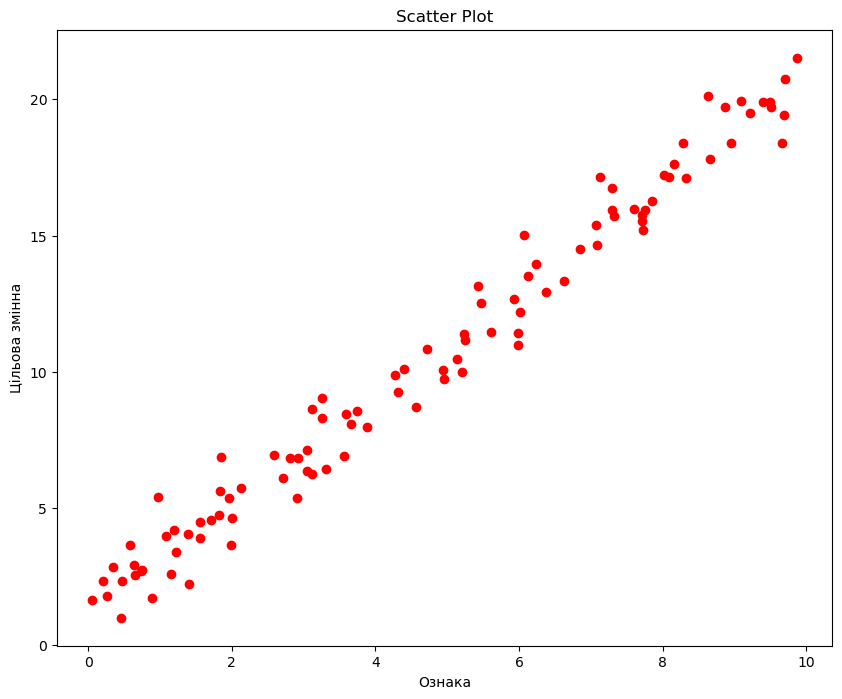

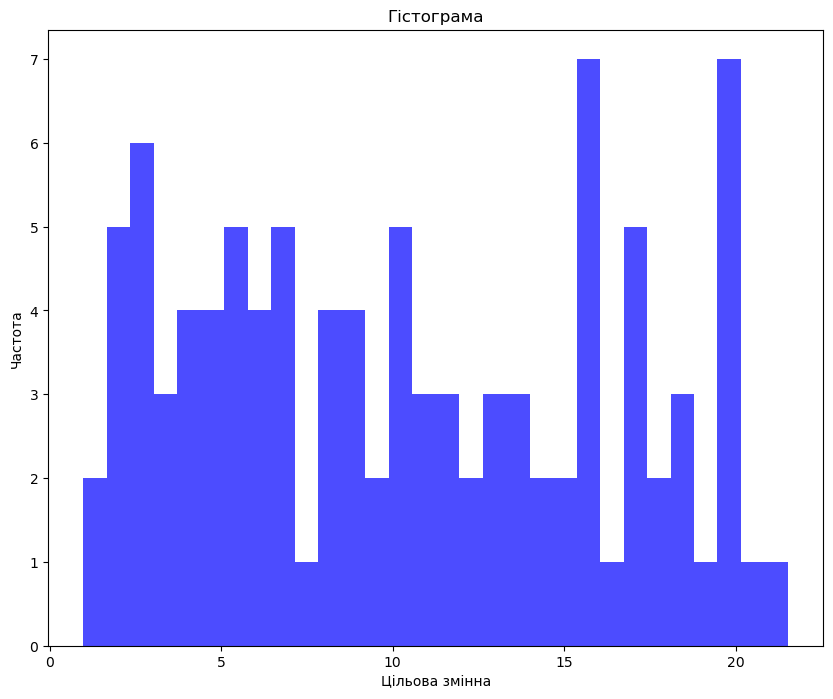

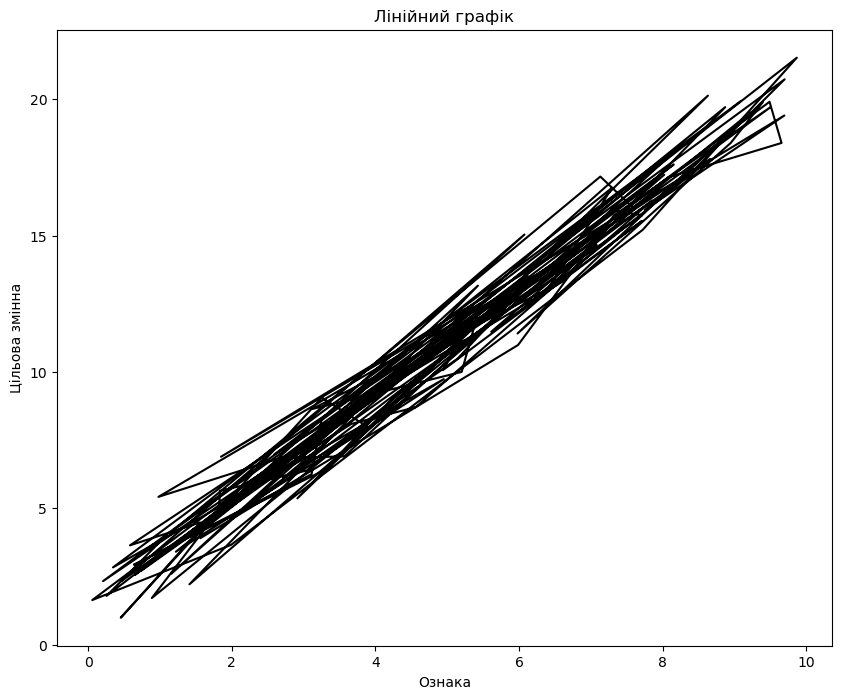

In [21]:
# 3_a
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_reg, y_reg, color='red')
plt.title('Scatter Plot')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.show()

# Гістограма
plt.figure(figsize=(10, 8))
plt.hist(y_reg, bins=30, color='blue', alpha=0.7)
plt.title('Гістограма')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.show()

# Лінійний графік
plt.figure(figsize=(10, 8))
plt.plot(X_reg, y_reg, color='black')
plt.title('Лінійний графік')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.show()

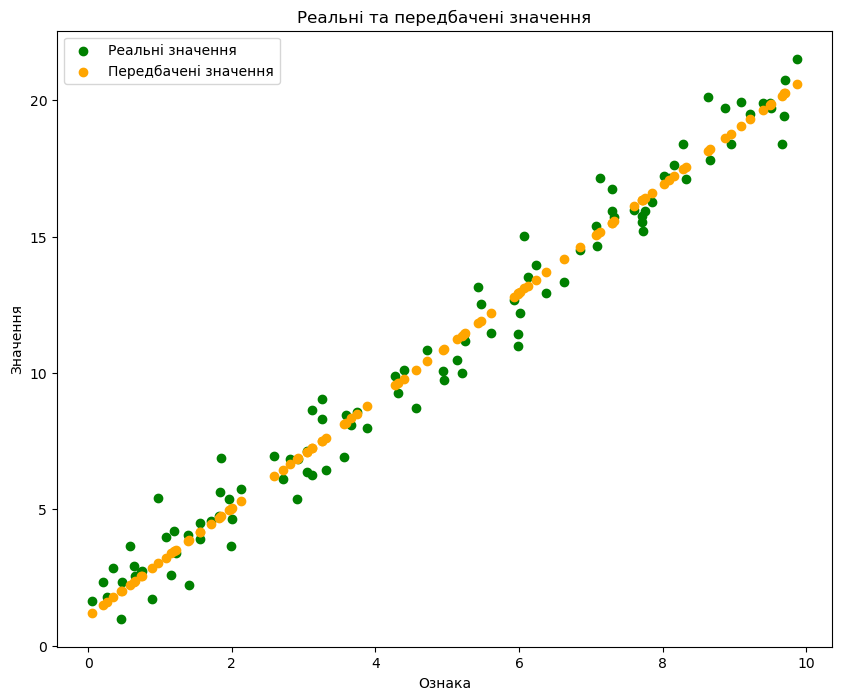

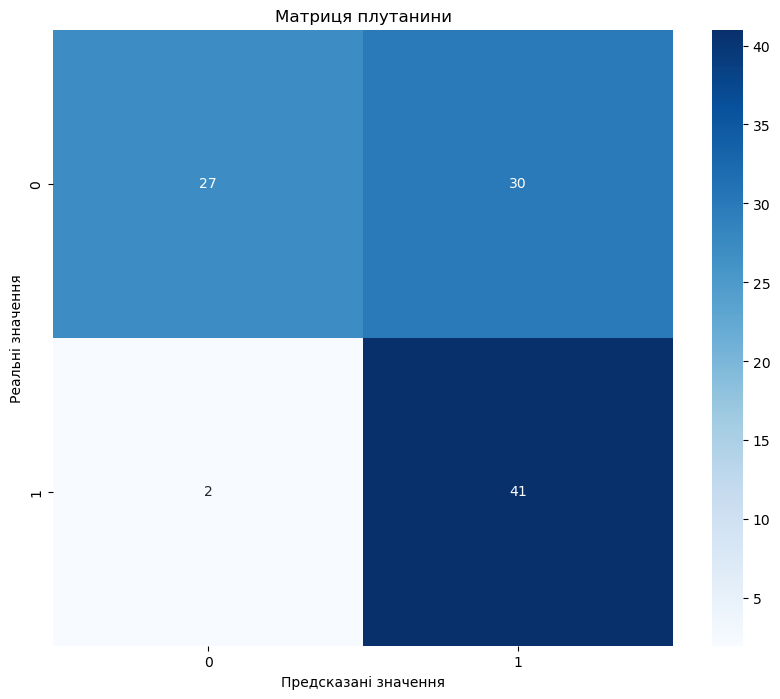

In [24]:
# 3_b
# Візуалізація реальних та передбачених значень
plt.figure(figsize=(10, 8))
plt.scatter(X_reg, y_reg, color='green', label='Реальні значення')
plt.scatter(X_reg, y_pred_reg, color='orange', label='Передбачені значення')
plt.title('Реальні та передбачені значення')
plt.xlabel('Ознака')
plt.ylabel('Значення')
plt.legend()
plt.show()

# Візуалізація матриці плутанини
cm = confusion_matrix(y_cls, y_pred_cls)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця плутанини')
plt.xlabel('Предсказані значення')
plt.ylabel('Реальні значення')
plt.show()